In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 학교급_및_특성별_사교육_참여율

In [4]:
data = pd.read_csv('학교급_및_특성별_사교육_참여율_20241117204656.csv')
data

,특성별,2023,2023.1,2023.2,2023.3,2023.4
0,특성별,평 균 (%),초등학교 (%),중학교 (%),고등학교 (%),일반고 (%)
1,전체,78.5,86.0,75.4,66.4,72.3
2,대도시,81.1,88.3,77.9,70.0,76.0
3,서울,84.8,91.3,81.9,75.5,80.9
4,광역시,78.7,86.5,75.4,66.2,72.4
...,...,...,...,...,...,...
75,400 ~ 500만원 미만,76.8,84.7,72.7,63.1,68.6
76,500 ~ 600만원 미만,80.6,87.5,78.5,68.2,73.4
77,600 ~ 700만원 미만,85.1,92.1,82.0,73.3,76.9
78,700 ~ 800만원 미만,85.8,93.0,81.9,75.3,78.8


In [5]:
data['특성별'].unique()

array(['특성별', '전체', '대도시', '서울', '광역시', '대도시 이외', '중소도시', '읍면지역',
       '과목: 일반교과 사교육', '국어', '영어', '수학', '사회, 과학', '논술',
       '제2외국어, 한문, 컴퓨터 등', '컴퓨터', '제2외국어, 한문 등', '과목: 예체능,취미,교양 사교육',
       '음악', '미술', '체육', '취미·교양', '과목: 취업관련 사교육', '과목: 진로·진학 학습상담',
       '유형: 일반교과 사교육', '개인과외', '그룹과외', '학원수강', '방문학습지', '유료인터넷 및 통신강좌 등',
       '유형: 예체능,취미,교양 사교육', '방문수업 및 기타', '남자', '여자', '자녀수: 1명', '2명',
       '첫째', '둘째', '3명 이상', '셋째 이상', '학교성적: 상위 10% 이내', '11 ~ 30%',
       '31 ~ 60%', '61 ~ 80%', '81 ~ 100%', '아버지의 연령: 20 ~ 30대', '40대',
       '50대 이상', '아버지의 교육정도 : 고졸이하', '중졸이하', '고졸', '대졸', '대학원졸',
       '어머니의 연령: 20 ~ 30대', '어머니의 교육정도: 고졸이하', '외벌이', '아버지', '어머니', '맞벌이',
       '경제활동 안함', '가구의 월소득: 300만원 미만', '200만원 미만', '200 ~ 300만원 미만',
       '300 ~ 400만원 미만', '400 ~ 500만원 미만', '500 ~ 600만원 미만',
       '600 ~ 700만원 미만', '700 ~ 800만원 미만', '800만원 이상'], dtype=object)

In [6]:
# 첫 번째 행을 컬럼으로 설정
data.columns = data.iloc[0]  # 첫 번째 행을 컬럼으로 설정
data = data.drop(0).reset_index(drop=True)  # 첫 번째 행 삭제 후 인덱스 재설정

# 결과 출력
data

,특성별,평 균 (%),초등학교 (%),중학교 (%),고등학교 (%),일반고 (%)
0,전체,78.5,86.0,75.4,66.4,72.3
1,대도시,81.1,88.3,77.9,70.0,76.0
2,서울,84.8,91.3,81.9,75.5,80.9
3,광역시,78.7,86.5,75.4,66.2,72.4
4,대도시 이외,76.9,84.6,73.8,64.1,69.9
...,...,...,...,...,...,...
74,400 ~ 500만원 미만,76.8,84.7,72.7,63.1,68.6
75,500 ~ 600만원 미만,80.6,87.5,78.5,68.2,73.4
76,600 ~ 700만원 미만,85.1,92.1,82.0,73.3,76.9
77,700 ~ 800만원 미만,85.8,93.0,81.9,75.3,78.8


## 대도시

In [8]:
# 특정 행만 선택
target_rows = ["전체", "대도시", "서울", "광역시"]
data_city = data[data["특성별"].isin(target_rows)].reset_index(drop=True)

# 결과 출력
data_city

,특성별,평 균 (%),초등학교 (%),중학교 (%),고등학교 (%),일반고 (%)
0,전체,78.5,86.0,75.4,66.4,72.3
1,대도시,81.1,88.3,77.9,70.0,76.0
2,서울,84.8,91.3,81.9,75.5,80.9
3,광역시,78.7,86.5,75.4,66.2,72.4


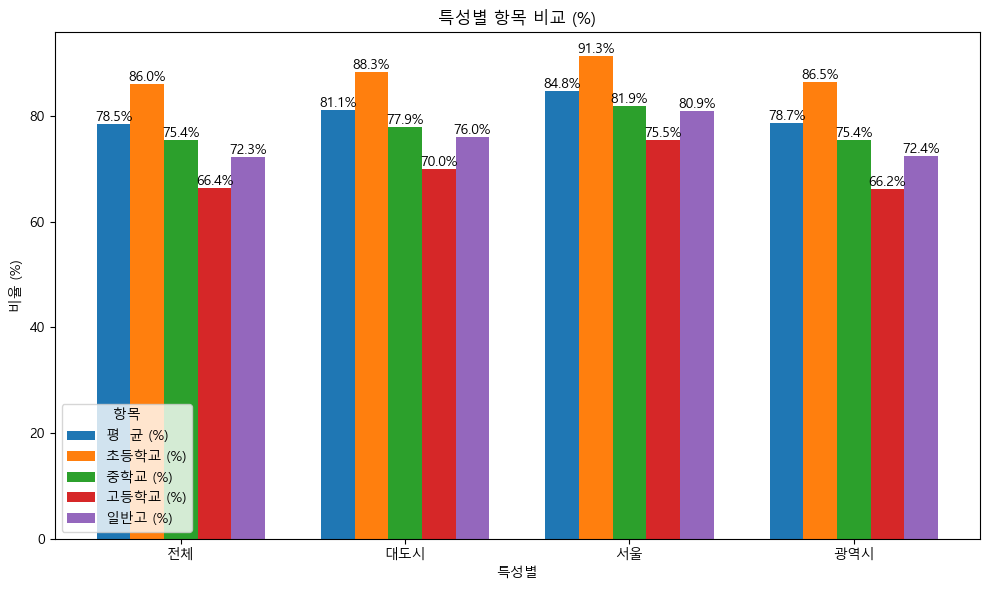

In [9]:
# 숫자 데이터로 변환
data_city.iloc[:, 1:] = data_city.iloc[:, 1:].apply(pd.to_numeric)

# 시각화
x = data_city["특성별"]  # x축에 표시할 특성
y = data_city.iloc[:, 1:]  # y축에 표시할 데이터

# 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
positions = np.arange(len(x))

for i, column in enumerate(y.columns):
    bars = ax.bar(positions + i * bar_width, y[column], bar_width, label=column)
    # 막대 위에 숫자 추가
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height():.1f}%',
            ha='center',
            va='bottom'
        )

# 그래프 설정
ax.set_title("특성별 항목 비교 (%)")
ax.set_ylabel("비율 (%)")
ax.set_xlabel("특성별")
ax.set_xticks(positions + bar_width * (len(y.columns) / 2 - 0.5))
ax.set_xticklabels(x)
ax.legend(title="항목")
plt.tight_layout()
plt.show()

## 대도시 이외

In [11]:
# 특정 행만 선택
target_rows = ["전체", "대도시 이외", "중소도시", "읍면지역"]
data_n_city = data[data["특성별"].isin(target_rows)].reset_index(drop=True)

# 결과 출력
data_n_city

,특성별,평 균 (%),초등학교 (%),중학교 (%),고등학교 (%),일반고 (%)
0,전체,78.5,86.0,75.4,66.4,72.3
1,대도시 이외,76.9,84.6,73.8,64.1,69.9
2,중소도시,79.5,86.6,76.4,67.9,73.0
3,읍면지역,69.9,79.3,66.3,53.6,60.8


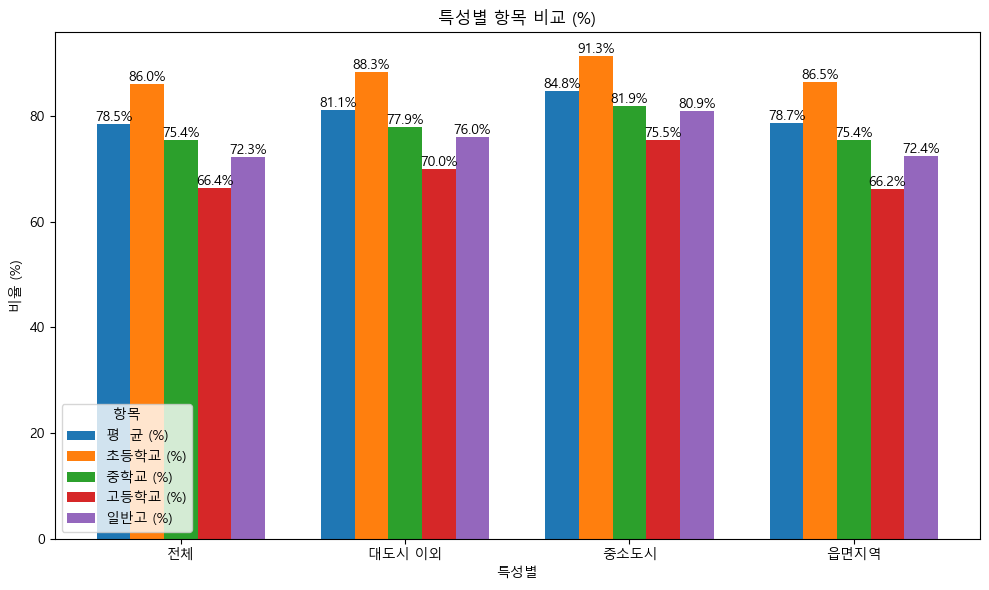

In [12]:
# 숫자 데이터로 변환
data_n_city.iloc[:, 1:] = data_city.iloc[:, 1:].apply(pd.to_numeric)

# 시각화
x = data_n_city["특성별"]  # x축에 표시할 특성
y = data_n_city.iloc[:, 1:]  # y축에 표시할 데이터

# 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
positions = np.arange(len(x))

for i, column in enumerate(y.columns):
    bars = ax.bar(positions + i * bar_width, y[column], bar_width, label=column)
    # 막대 위에 숫자 추가
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height():.1f}%',
            ha='center',
            va='bottom'
        )

# 그래프 설정
ax.set_title("특성별 항목 비교 (%)")
ax.set_ylabel("비율 (%)")
ax.set_xlabel("특성별")
ax.set_xticks(positions + bar_width * (len(y.columns) / 2 - 0.5))
ax.set_xticklabels(x)
ax.legend(title="항목")
plt.tight_layout()
plt.show()

## 과목 대분류

In [14]:
target_rows = ["전체", "과목: 일반교과 사교육", "과목: 예체능,취미,교양 사교육", "과목: 취업관련 사교육", "과목: 진로·진학 학습상담"]
data_subject = data[data["특성별"].isin(target_rows)].reset_index(drop=True)

# 결과 출력
data_subject

,특성별,평 균 (%),초등학교 (%),중학교 (%),고등학교 (%),일반고 (%)
0,전체,78.5,86.0,75.4,66.4,72.3
1,과목: 일반교과 사교육,62.9,64.6,66.3,56.1,63.1
2,"과목: 예체능,취미,교양 사교육",46.4,70.0,29.2,16.0,15.9
3,과목: 취업관련 사교육,0.5,-,-,1.9,1.2
4,과목: 진로·진학 학습상담,2.6,1.9,2.3,4.5,4.9


C:\Users\User\AppData\Local\Temp\ipykernel_6924\2953007195.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_subject = data_subject.fillna(0)


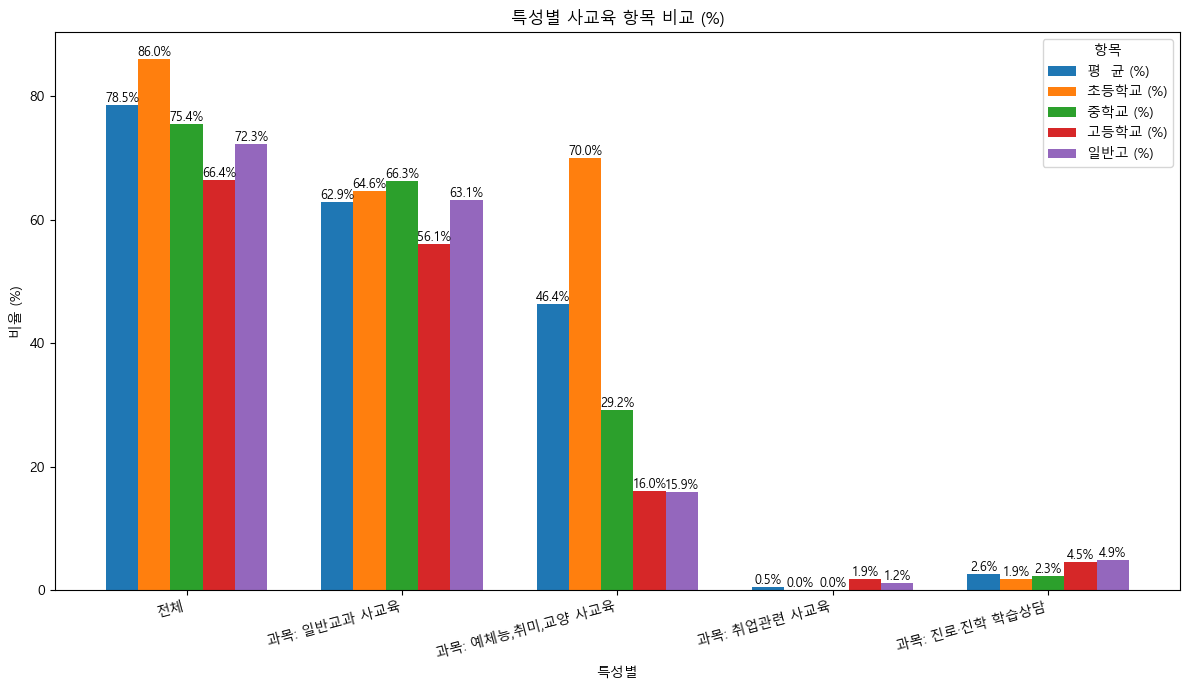

In [15]:
# 숫자 데이터로 변환 (문제 값 "-"을 NaN으로 처리)
data_subject.iloc[:, 1:] = data_subject.iloc[:, 1:].replace("-", np.nan).apply(pd.to_numeric)

# NaN 값을 0으로 대체 (또는 원하는 값으로 대체 가능)
data_subject = data_subject.fillna(0)

# 시각화
x = data_subject["특성별"]  # x축에 표시할 특성
y = data_subject.iloc[:, 1:]  # y축에 표시할 데이터

# 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.15
positions = np.arange(len(x))

for i, column in enumerate(y.columns):
    bars = ax.bar(positions + i * bar_width, y[column], bar_width, label=column)
    # 막대 위에 숫자 추가
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height():.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

# 그래프 설정
ax.set_title("특성별 사교육 항목 비교 (%)")
ax.set_ylabel("비율 (%)")
ax.set_xlabel("특성별")
ax.set_xticks(positions + bar_width * (len(y.columns) / 2 - 0.5))
ax.set_xticklabels(x, rotation=15, ha='right')  # 레이블 기울임
ax.legend(title="항목")
plt.tight_layout()
plt.show()

## 과목: 일반교과 사교육

In [17]:
target_rows = ["전체", "과목: 일반교과 사교육", "국어", "영어", "수학", "사회, 과학","논술","제2외국어, 한문, 컴퓨터 등"]
data_subject1 = data[data["특성별"].isin(target_rows)].reset_index(drop=True)

# 결과 출력
data_subject1

,특성별,평 균 (%),초등학교 (%),중학교 (%),고등학교 (%),일반고 (%)
0,전체,78.5,86.0,75.4,66.4,72.3
1,과목: 일반교과 사교육,62.9,64.6,66.3,56.1,63.1
2,국어,25.6,28.3,19.0,26.9,30.9
3,영어,51.5,52.5,58.4,42.4,48.2
4,수학,52.5,50.5,61.3,47.4,53.8
5,"사회, 과학",14.2,12.9,15.9,15.0,17.3
6,논술,10.2,15.6,7.9,1.6,1.8
7,"제2외국어, 한문, 컴퓨터 등",5.9,9.1,3.2,2.0,1.9


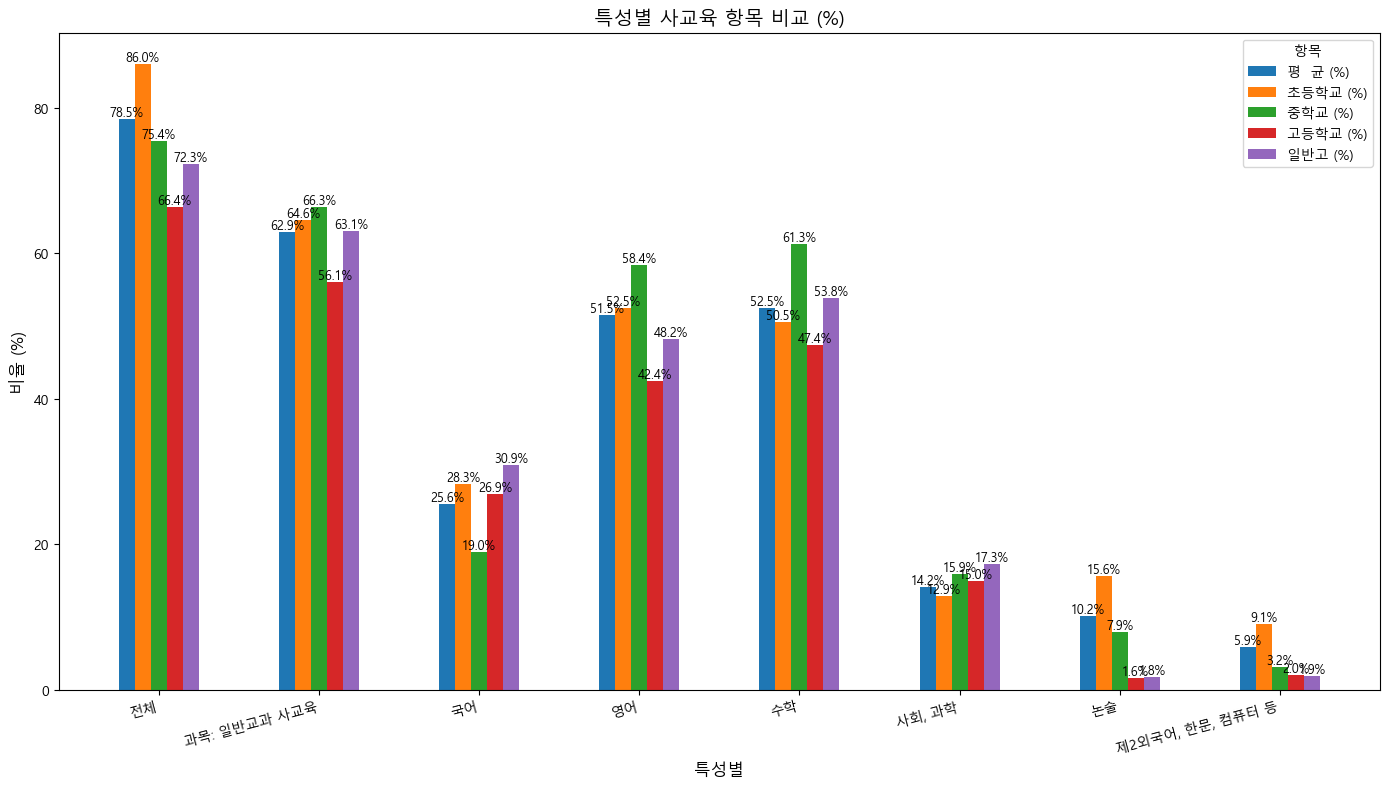

In [18]:
# 숫자 데이터로 변환
data_subject1.iloc[:, 1:] = data_subject1.iloc[:, 1:].apply(pd.to_numeric)

# 시각화
x = data_subject1["특성별"]  # x축에 표시할 특성
y = data_subject1.iloc[:, 1:]  # y축에 표시할 데이터

# 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.1
positions = np.arange(len(x))

for i, column in enumerate(y.columns):
    bars = ax.bar(positions + i * bar_width, y[column], bar_width, label=column)
    # 막대 위에 숫자 추가
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height():.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

# 그래프 설정
ax.set_title("특성별 사교육 항목 비교 (%)", fontsize=14)
ax.set_ylabel("비율 (%)", fontsize=12)
ax.set_xlabel("특성별", fontsize=12)
ax.set_xticks(positions + bar_width * (len(y.columns) / 2 - 0.5))
ax.set_xticklabels(x, rotation=15, ha='right')  # 레이블 기울임
ax.legend(title="항목", fontsize=10)
plt.tight_layout()
plt.show()

## 소득별

In [20]:
target_rows = ["전체", '경제활동 안함','200만원 미만', '200 ~ 300만원 미만',
       '300 ~ 400만원 미만', '400 ~ 500만원 미만', '500 ~ 600만원 미만',
       '600 ~ 700만원 미만', '700 ~ 800만원 미만', '800만원 이상']
data_income = data[data["특성별"].isin(target_rows)].reset_index(drop=True)

# 결과 출력
data_income

,특성별,평 균 (%),초등학교 (%),중학교 (%),고등학교 (%),일반고 (%)
0,전체,78.5,86.0,75.4,66.4,72.3
1,경제활동 안함,44.3,58.1,46.8,33.5,41.1
2,200만원 미만,49.8,59.4,47.6,34.7,42.7
3,200 ~ 300만원 미만,60.7,69.9,56.2,48.3,56.2
4,300 ~ 400만원 미만,70.3,79.6,63.6,55.8,62.7
5,400 ~ 500만원 미만,76.8,84.7,72.7,63.1,68.6
6,500 ~ 600만원 미만,80.6,87.5,78.5,68.2,73.4
7,600 ~ 700만원 미만,85.1,92.1,82.0,73.3,76.9
8,700 ~ 800만원 미만,85.8,93.0,81.9,75.3,78.8
9,800만원 이상,87.9,94.1,86.9,77.8,81.0


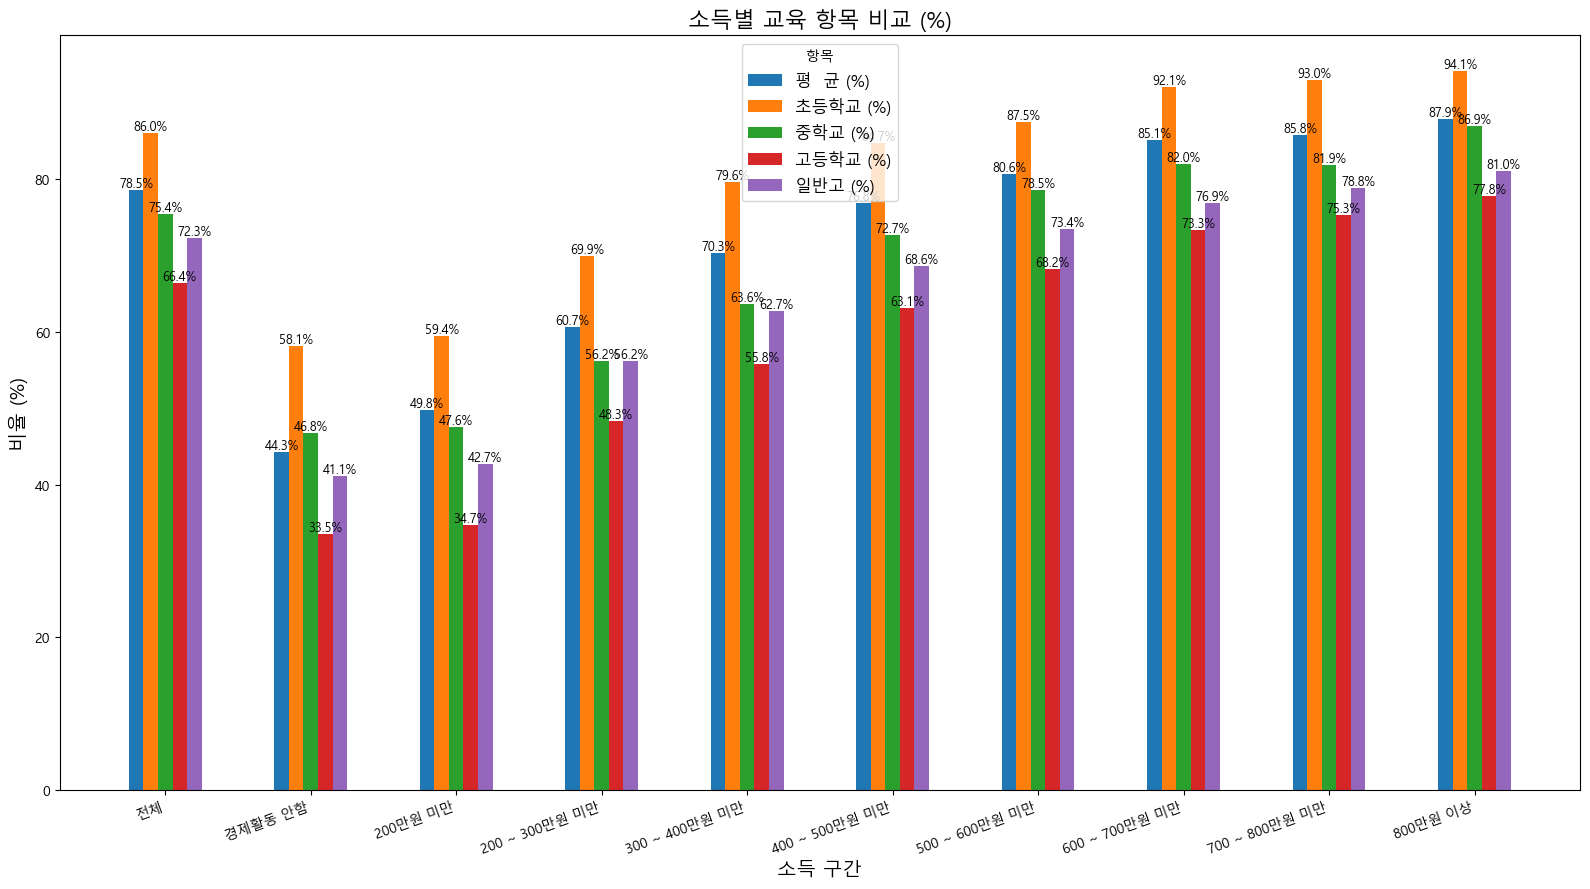

In [21]:
#숫자 데이터로 변환
data_income.iloc[:, 1:] = data_income.iloc[:, 1:].apply(pd.to_numeric)

# 시각화
x = data_income["특성별"]  # x축에 표시할 특성
y = data_income.iloc[:, 1:]  # y축에 표시할 데이터

# 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(16, 9))  # 크기 조정
bar_width = 0.1
positions = np.arange(len(x))

for i, column in enumerate(y.columns):
    bars = ax.bar(positions + i * bar_width, y[column], bar_width, label=column)
    # 막대 위에 숫자 추가
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height():.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

# 그래프 설정
ax.set_title("소득별 교육 항목 비교 (%)", fontsize=16)
ax.set_ylabel("비율 (%)", fontsize=14)
ax.set_xlabel("소득 구간", fontsize=14)
ax.set_xticks(positions + bar_width * (len(y.columns) / 2 - 0.5))
ax.set_xticklabels(x, rotation=20, ha='right')  # 레이블 기울임
ax.legend(title="항목", fontsize=12)
plt.tight_layout()
plt.show()

# 중학생_이상_자녀양육의_어려움

In [23]:
data2 = pd.read_csv('중학생_이상_자녀양육의_어려움_20241123164901.csv')

In [24]:
data2

,특성별(1),특성별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,...,2021.30,2021.31,2021.32,2021.33,2021.34,2021.35,2021.36,2021.37,2021.38,2021.39
0,특성별(1),특성별(2),자녀와 대화 어려움,자녀와 대화 어려움,자녀와 대화 어려움,자녀와 대화 어려움,자녀와 대화 어려움,자녀 학업성적,자녀 학업성적,자녀 학업성적,...,이성 성문제로 인한 어려움,이성 성문제로 인한 어려움,이성 성문제로 인한 어려움,이성 성문제로 인한 어려움,이성 성문제로 인한 어려움,양육 및 교육관련 정보 부족,양육 및 교육관련 정보 부족,양육 및 교육관련 정보 부족,양육 및 교육관련 정보 부족,양육 및 교육관련 정보 부족
1,특성별(1),특성별(2),사례수 (가구),전혀 그렇지 않다 (%),거의 그렇지 않다 (%),대체로 그렇다 (%),매우 그렇다 (%),사례수 (가구),전혀 그렇지 않다 (%),거의 그렇지 않다 (%),...,사례수 (가구),전혀 그렇지 않다 (%),거의 그렇지 않다 (%),대체로 그렇다 (%),매우 그렇다 (%),사례수 (가구),전혀 그렇지 않다 (%),거의 그렇지 않다 (%),대체로 그렇다 (%),매우 그렇다 (%)
2,전체,소계,2141,13.3,57.2,26.2,3.3,2135,9.1,31.8,...,2141,33.5,44.9,20.2,1.4,2141,10.3,36.4,47.3,6.0
3,한부모연령별,30대 이하,166,11.4,67.5,18.9,2.2,166,11.8,24.5,...,166,47.3,45.1,7.1,0.4,166,18.3,42.2,36.9,2.6
4,한부모연령별,40대,1503,13.4,56.7,26.3,3.6,1499,9.6,29.9,...,1503,32.5,44.3,21.7,1.4,1503,10.2,34.5,49.0,6.3
5,한부모연령별,50대 이상,471,13.7,55.0,28.5,2.8,469,6.2,40.2,...,471,31.6,46.8,20.1,1.5,471,8.0,40.4,45.3,6.4
6,한부모학력별,중졸 이하,91,10.6,51.9,29.2,8.2,91,4.7,25.9,...,91,48.7,37.3,13.5,0.6,91,12.1,26.3,49.2,12.4
7,한부모학력별,고졸 이하,1362,12.6,56.6,27.2,3.6,1359,8.6,31.1,...,1362,32.0,46.9,19.8,1.3,1362,9.8,37.8,46.4,6.0
8,한부모학력별,대학 이상,687,15.0,59.1,24.0,1.9,685,10.6,33.8,...,687,34.4,42.1,21.8,1.7,687,11.2,34.9,48.7,5.2
9,혼인상태별,이혼,1762,13.6,56.7,26.2,3.5,1758,9.1,30.3,...,1762,33.3,44.7,20.7,1.4,1762,10.2,34.9,49.1,5.8


In [25]:
# 0번과 1번 행 결합하여 새로운 컬럼 이름 생성
new_columns = data2.iloc[0] + " - " + data2.iloc[1]

# DataFrame의 컬럼 이름 업데이트
data2.columns = new_columns

# 0번과 1번 행 삭제
data2 = data2.drop([0, 1]).reset_index(drop=True)

# 결과 출력
data2

,특성별(1) - 특성별(1),특성별(2) - 특성별(2),자녀와 대화 어려움 - 사례수 (가구),자녀와 대화 어려움 - 전혀 그렇지 않다 (%),자녀와 대화 어려움 - 거의 그렇지 않다 (%),자녀와 대화 어려움 - 대체로 그렇다 (%),자녀와 대화 어려움 - 매우 그렇다 (%),자녀 학업성적 - 사례수 (가구),자녀 학업성적 - 전혀 그렇지 않다 (%),자녀 학업성적 - 거의 그렇지 않다 (%),...,이성 성문제로 인한 어려움 - 사례수 (가구),이성 성문제로 인한 어려움 - 전혀 그렇지 않다 (%),이성 성문제로 인한 어려움 - 거의 그렇지 않다 (%),이성 성문제로 인한 어려움 - 대체로 그렇다 (%),이성 성문제로 인한 어려움 - 매우 그렇다 (%),양육 및 교육관련 정보 부족 - 사례수 (가구),양육 및 교육관련 정보 부족 - 전혀 그렇지 않다 (%),양육 및 교육관련 정보 부족 - 거의 그렇지 않다 (%),양육 및 교육관련 정보 부족 - 대체로 그렇다 (%),양육 및 교육관련 정보 부족 - 매우 그렇다 (%)
0,전체,소계,2141,13.3,57.2,26.2,3.3,2135,9.1,31.8,...,2141,33.5,44.9,20.2,1.4,2141,10.3,36.4,47.3,6.0
1,한부모연령별,30대 이하,166,11.4,67.5,18.9,2.2,166,11.8,24.5,...,166,47.3,45.1,7.1,0.4,166,18.3,42.2,36.9,2.6
2,한부모연령별,40대,1503,13.4,56.7,26.3,3.6,1499,9.6,29.9,...,1503,32.5,44.3,21.7,1.4,1503,10.2,34.5,49.0,6.3
3,한부모연령별,50대 이상,471,13.7,55.0,28.5,2.8,469,6.2,40.2,...,471,31.6,46.8,20.1,1.5,471,8.0,40.4,45.3,6.4
4,한부모학력별,중졸 이하,91,10.6,51.9,29.2,8.2,91,4.7,25.9,...,91,48.7,37.3,13.5,0.6,91,12.1,26.3,49.2,12.4
5,한부모학력별,고졸 이하,1362,12.6,56.6,27.2,3.6,1359,8.6,31.1,...,1362,32.0,46.9,19.8,1.3,1362,9.8,37.8,46.4,6.0
6,한부모학력별,대학 이상,687,15.0,59.1,24.0,1.9,685,10.6,33.8,...,687,34.4,42.1,21.8,1.7,687,11.2,34.9,48.7,5.2
7,혼인상태별,이혼,1762,13.6,56.7,26.2,3.5,1758,9.1,30.3,...,1762,33.3,44.7,20.7,1.4,1762,10.2,34.9,49.1,5.8
8,혼인상태별,사별,271,14.2,58.3,25.2,2.4,270,10.4,34.5,...,271,36.1,42.2,19.7,2.0,271,11.8,42.4,39.0,6.8
9,혼인상태별,기타,107,6.7,62.3,28.7,2.3,107,5.2,49.3,...,107,30.1,56.7,13.1,-,107,8.6,44.4,38.5,8.4


In [26]:
# 두 열을 "-"로 연결하여 새로운 열 생성
data2["특성별"] = data2["특성별(1) - 특성별(1)"] + " - " + data2["특성별(2) - 특성별(2)"]

# 기존 두 열 삭제 (선택사항)
data2 = data2.drop(columns=["특성별(1) - 특성별(1)", "특성별(2) - 특성별(2)"])

# 결과 출력
data2

,자녀와 대화 어려움 - 사례수 (가구),자녀와 대화 어려움 - 전혀 그렇지 않다 (%),자녀와 대화 어려움 - 거의 그렇지 않다 (%),자녀와 대화 어려움 - 대체로 그렇다 (%),자녀와 대화 어려움 - 매우 그렇다 (%),자녀 학업성적 - 사례수 (가구),자녀 학업성적 - 전혀 그렇지 않다 (%),자녀 학업성적 - 거의 그렇지 않다 (%),자녀 학업성적 - 대체로 그렇다 (%),자녀 학업성적 - 매우 그렇다 (%),...,이성 성문제로 인한 어려움 - 전혀 그렇지 않다 (%),이성 성문제로 인한 어려움 - 거의 그렇지 않다 (%),이성 성문제로 인한 어려움 - 대체로 그렇다 (%),이성 성문제로 인한 어려움 - 매우 그렇다 (%),양육 및 교육관련 정보 부족 - 사례수 (가구),양육 및 교육관련 정보 부족 - 전혀 그렇지 않다 (%),양육 및 교육관련 정보 부족 - 거의 그렇지 않다 (%),양육 및 교육관련 정보 부족 - 대체로 그렇다 (%),양육 및 교육관련 정보 부족 - 매우 그렇다 (%),특성별
0,2141,13.3,57.2,26.2,3.3,2135,9.1,31.8,47.9,11.3,...,33.5,44.9,20.2,1.4,2141,10.3,36.4,47.3,6.0,전체 - 소계
1,166,11.4,67.5,18.9,2.2,166,11.8,24.5,56.6,7.1,...,47.3,45.1,7.1,0.4,166,18.3,42.2,36.9,2.6,한부모연령별 - 30대 이하
2,1503,13.4,56.7,26.3,3.6,1499,9.6,29.9,48.8,11.6,...,32.5,44.3,21.7,1.4,1503,10.2,34.5,49.0,6.3,한부모연령별 - 40대
3,471,13.7,55.0,28.5,2.8,469,6.2,40.2,42.0,11.6,...,31.6,46.8,20.1,1.5,471,8.0,40.4,45.3,6.4,한부모연령별 - 50대 이상
4,91,10.6,51.9,29.2,8.2,91,4.7,25.9,49.3,20.1,...,48.7,37.3,13.5,0.6,91,12.1,26.3,49.2,12.4,한부모학력별 - 중졸 이하
5,1362,12.6,56.6,27.2,3.6,1359,8.6,31.1,48.8,11.5,...,32.0,46.9,19.8,1.3,1362,9.8,37.8,46.4,6.0,한부모학력별 - 고졸 이하
6,687,15.0,59.1,24.0,1.9,685,10.6,33.8,45.9,9.7,...,34.4,42.1,21.8,1.7,687,11.2,34.9,48.7,5.2,한부모학력별 - 대학 이상
7,1762,13.6,56.7,26.2,3.5,1758,9.1,30.3,49.3,11.4,...,33.3,44.7,20.7,1.4,1762,10.2,34.9,49.1,5.8,혼인상태별 - 이혼
8,271,14.2,58.3,25.2,2.4,270,10.4,34.5,43.8,11.4,...,36.1,42.2,19.7,2.0,271,11.8,42.4,39.0,6.8,혼인상태별 - 사별
9,107,6.7,62.3,28.7,2.3,107,5.2,49.3,35.8,9.7,...,30.1,56.7,13.1,-,107,8.6,44.4,38.5,8.4,혼인상태별 - 기타


## 1. ?

In [28]:
# '(가구)'가 포함된 칼럼만 선택
filtered_columns = ['특성별'] + [col for col in data2.columns if '(가구)' in col]
filtered_data = data2[filtered_columns]

# 결과 출력
filtered_data

,특성별,자녀와 대화 어려움 - 사례수 (가구),자녀 학업성적 - 사례수 (가구),양육비 교육비용 부담 - 사례수 (가구),자녀 진로지도 어려움 - 사례수 (가구),양육 스트레스 - 사례수 (가구),생활지도 어려움 - 사례수 (가구),이성 성문제로 인한 어려움 - 사례수 (가구),양육 및 교육관련 정보 부족 - 사례수 (가구)
0,전체 - 소계,2141,2135,2141,2141,2141,2141,2141,2141
1,한부모연령별 - 30대 이하,166,166,166,166,166,166,166,166
2,한부모연령별 - 40대,1503,1499,1503,1503,1503,1503,1503,1503
3,한부모연령별 - 50대 이상,471,469,471,471,471,471,471,471
4,한부모학력별 - 중졸 이하,91,91,91,91,91,91,91,91
5,한부모학력별 - 고졸 이하,1362,1359,1362,1362,1362,1362,1362,1362
6,한부모학력별 - 대학 이상,687,685,687,687,687,687,687,687
7,혼인상태별 - 이혼,1762,1758,1762,1762,1762,1762,1762,1762
8,혼인상태별 - 사별,271,270,271,271,271,271,271,271
9,혼인상태별 - 기타,107,107,107,107,107,107,107,107


## 2) 자녀와 대화 어려움

C:\Users\User\AppData\Local\Temp\ipykernel_6924\101616494.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered.fillna(0, inplace=True)


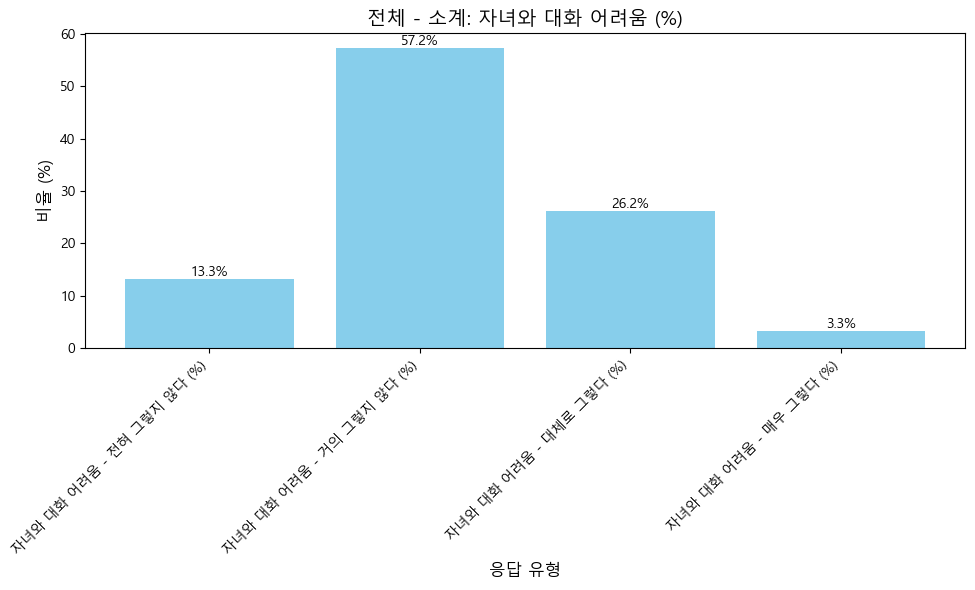

In [30]:
filtered_columns = ['특성별'] + [col for col in data2.columns if '자녀와 대화 어려움 ' in col]
filtered_data = data2[filtered_columns]

# 결과 출력
filtered_data

# "사례수 (가구)" 열 제외
df_filtered = filtered_data.drop(columns=["자녀와 대화 어려움 - 사례수 (가구)"])

# 데이터 타입 변환 (object -> float), 변환 불가능한 값은 NaN으로 처리
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# NaN 값을 확인하고 필요시 처리 (여기서는 0으로 대체)
df_filtered.fillna(0, inplace=True)

# 0번 행 데이터 추출
row_data = df_filtered.iloc[0, 1:]  # 첫 번째 행의 데이터 (특성별 제외)
labels = row_data.index  # x축 레이블
values = row_data.values  # y축 값

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')

# 막대 위에 수치 표시
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# 그래프 설정
plt.title("전체 - 소계: 자녀와 대화 어려움 (%)", fontsize=14)
plt.ylabel("비율 (%)", fontsize=12)
plt.xlabel("응답 유형", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 3) 자녀 학업성적 

C:\Users\User\AppData\Local\Temp\ipykernel_6924\1895921577.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered.fillna(0, inplace=True)


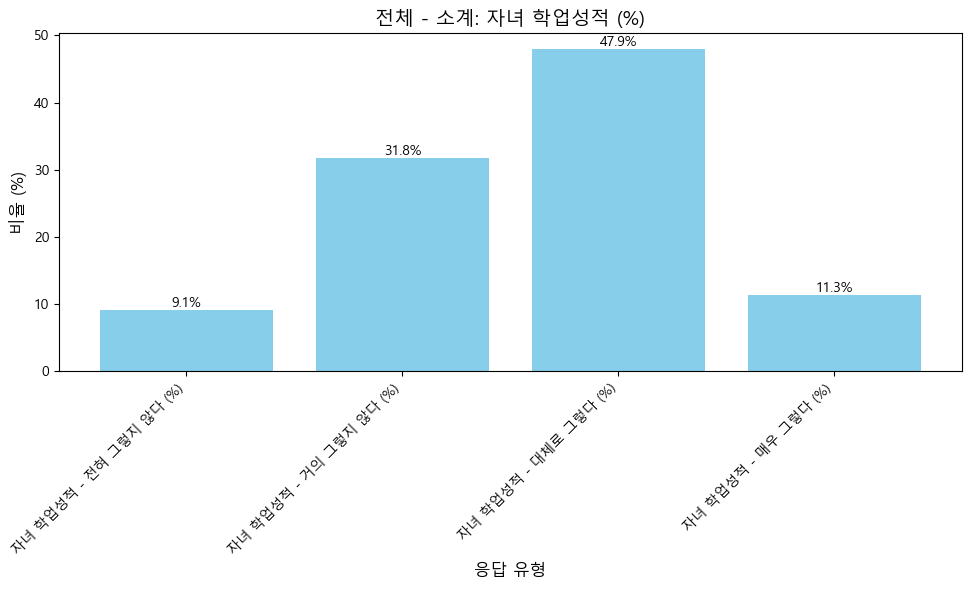

In [32]:
filtered_columns = ['특성별'] + [col for col in data2.columns if '자녀 학업성적 ' in col]
filtered_data = data2[filtered_columns]

# 결과 출력
filtered_data

# "사례수 (가구)" 열 제외
df_filtered = filtered_data.drop(columns=["자녀 학업성적 - 사례수 (가구)"])

# 데이터 타입 변환 (object -> float), 변환 불가능한 값은 NaN으로 처리
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# NaN 값을 확인하고 필요시 처리 (여기서는 0으로 대체)
df_filtered.fillna(0, inplace=True)

# 0번 행 데이터 추출
row_data = df_filtered.iloc[0, 1:]  # 첫 번째 행의 데이터 (특성별 제외)
labels = row_data.index  # x축 레이블
values = row_data.values  # y축 값

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')

# 막대 위에 수치 표시
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# 그래프 설정
plt.title("전체 - 소계: 자녀 학업성적 (%)", fontsize=14)
plt.ylabel("비율 (%)", fontsize=12)
plt.xlabel("응답 유형", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 4) 양육비 교육비용 부담

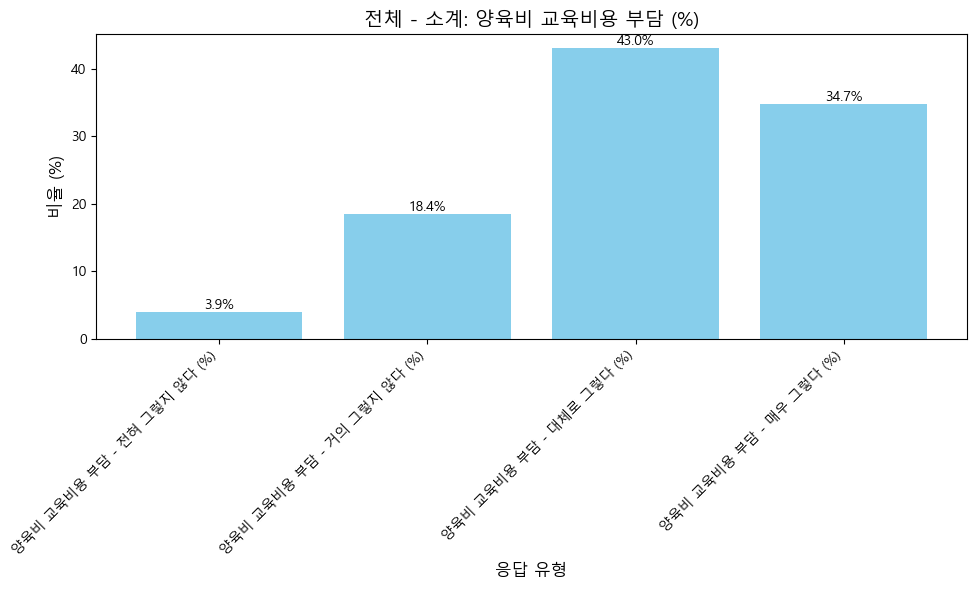

In [34]:
filtered_columns = ['특성별'] + [col for col in data2.columns if '양육비 교육비용 부담 ' in col]
filtered_data = data2[filtered_columns]

# 결과 출력
filtered_data

# "사례수 (가구)" 열 제외
df_filtered = filtered_data.drop(columns=["양육비 교육비용 부담 - 사례수 (가구)"])

# 데이터 타입 변환 (object -> float), 변환 불가능한 값은 NaN으로 처리
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# NaN 값을 확인하고 필요시 처리 (여기서는 0으로 대체)
df_filtered.fillna(0, inplace=True)

# 0번 행 데이터 추출
row_data = df_filtered.iloc[0, 1:]  # 첫 번째 행의 데이터 (특성별 제외)
labels = row_data.index  # x축 레이블
values = row_data.values  # y축 값

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')

# 막대 위에 수치 표시
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# 그래프 설정
plt.title("전체 - 소계: 양육비 교육비용 부담 (%)", fontsize=14)
plt.ylabel("비율 (%)", fontsize=12)
plt.xlabel("응답 유형", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 5) 자녀 진로지도 어려움 (얘만 쓰면 될듯)

In [36]:
filtered_columns = ['특성별'] + [col for col in data2.columns if '자녀 진로지도 어려움 ' in col]
filtered_data = data2[filtered_columns]

# 결과 출력
filtered_data

,특성별,자녀 진로지도 어려움 - 사례수 (가구),자녀 진로지도 어려움 - 전혀 그렇지 않다 (%),자녀 진로지도 어려움 - 거의 그렇지 않다 (%),자녀 진로지도 어려움 - 대체로 그렇다 (%),자녀 진로지도 어려움 - 매우 그렇다 (%)
0,전체 - 소계,2141,6.0,27.0,50.4,16.6
1,한부모연령별 - 30대 이하,166,7.3,30.7,45.9,16.0
2,한부모연령별 - 40대,1503,5.9,26.8,50.4,16.9
3,한부모연령별 - 50대 이상,471,5.7,26.4,51.9,16.0
4,한부모학력별 - 중졸 이하,91,5.4,18.6,50.9,25.1
5,한부모학력별 - 고졸 이하,1362,5.9,24.7,52.8,16.5
6,한부모학력별 - 대학 이상,687,6.2,32.6,45.6,15.6
7,혼인상태별 - 이혼,1762,6.0,26.8,50.8,16.5
8,혼인상태별 - 사별,271,7.0,25.5,50.0,17.5
9,혼인상태별 - 기타,107,3.8,34.4,45.4,16.4


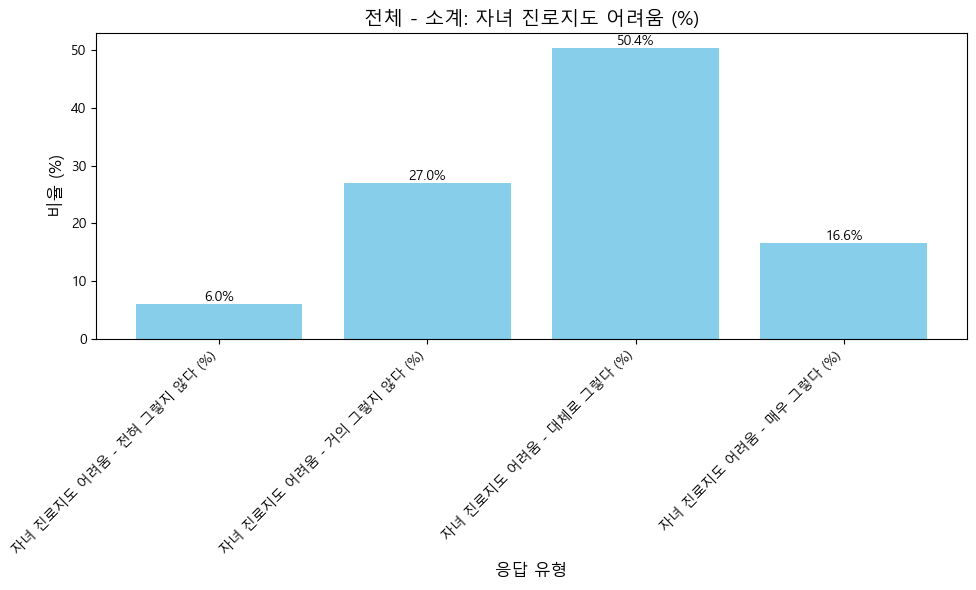

In [37]:
# "사례수 (가구)" 열 제외
df_filtered = filtered_data.drop(columns=["자녀 진로지도 어려움 - 사례수 (가구)"])

# 데이터 타입 변환 (object -> float), 변환 불가능한 값은 NaN으로 처리
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# NaN 값을 확인하고 필요시 처리 (여기서는 0으로 대체)
df_filtered.fillna(0, inplace=True)

# 0번 행 데이터 추출
row_data = df_filtered.iloc[0, 1:]  # 첫 번째 행의 데이터 (특성별 제외)
labels = row_data.index  # x축 레이블
values = row_data.values  # y축 값

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')

# 막대 위에 수치 표시
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# 그래프 설정
plt.title("전체 - 소계: 자녀 진로지도 어려움 (%)", fontsize=14)
plt.ylabel("비율 (%)", fontsize=12)
plt.xlabel("응답 유형", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 6) 생활지도 어려움 

C:\Users\User\AppData\Local\Temp\ipykernel_6924\1395745205.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered.fillna(0, inplace=True)


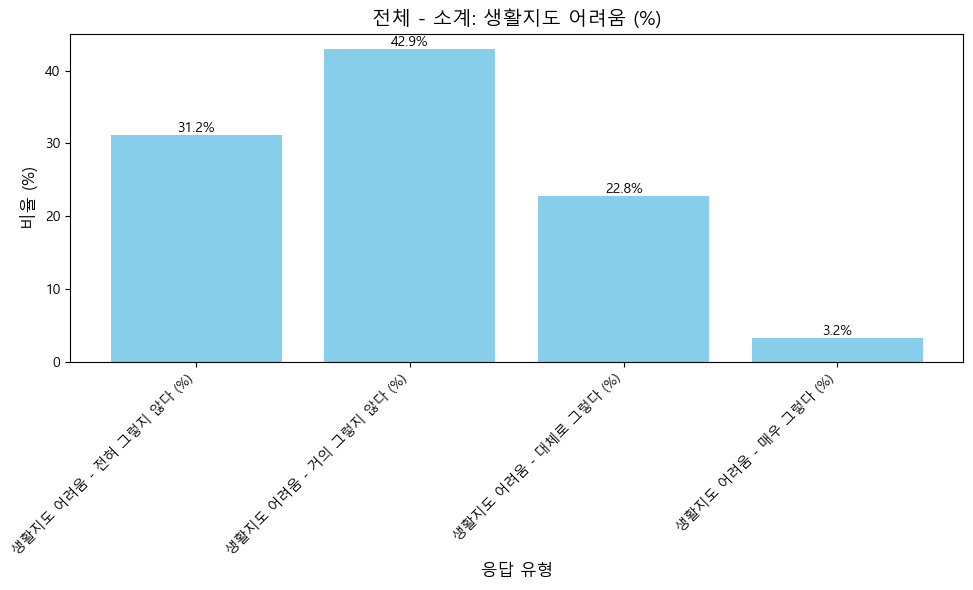

In [39]:
filtered_columns = ['특성별'] + [col for col in data2.columns if '생활지도 어려움' in col]
filtered_data = data2[filtered_columns]

# 결과 출력
filtered_data

# "사례수 (가구)" 열 제외
df_filtered = filtered_data.drop(columns=["생활지도 어려움 - 사례수 (가구)"])

# 데이터 타입 변환 (object -> float), 변환 불가능한 값은 NaN으로 처리
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# NaN 값을 확인하고 필요시 처리 (여기서는 0으로 대체)
df_filtered.fillna(0, inplace=True)

# 0번 행 데이터 추출
row_data = df_filtered.iloc[0, 1:]  # 첫 번째 행의 데이터 (특성별 제외)
labels = row_data.index  # x축 레이블
values = row_data.values  # y축 값

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')

# 막대 위에 수치 표시
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# 그래프 설정
plt.title("전체 - 소계: 생활지도 어려움 (%)", fontsize=14)
plt.ylabel("비율 (%)", fontsize=12)
plt.xlabel("응답 유형", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 7) 이성 성문제로 인한 어려움

C:\Users\User\AppData\Local\Temp\ipykernel_6924\3687882764.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered.fillna(0, inplace=True)


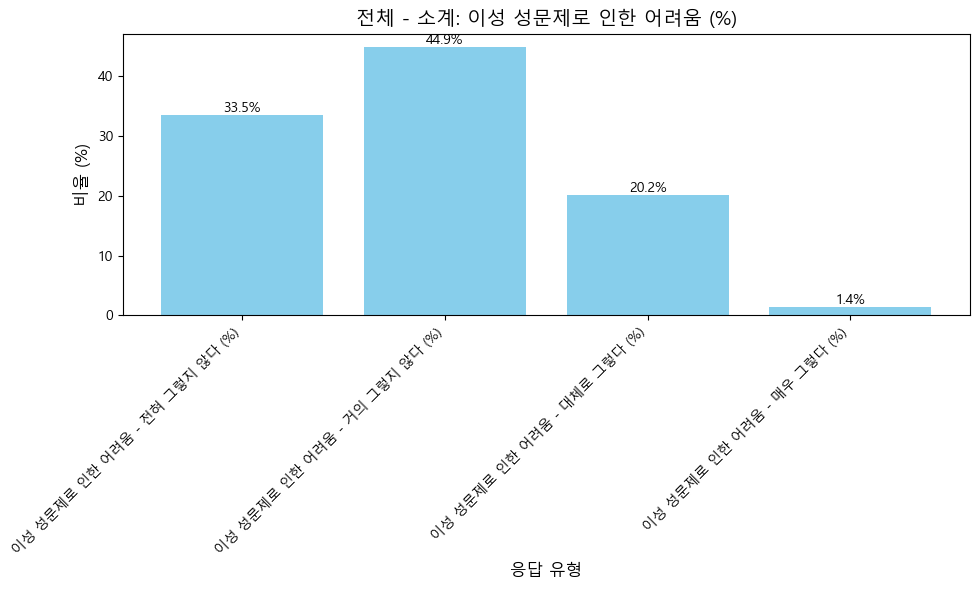

In [41]:
filtered_columns = ['특성별'] + [col for col in data2.columns if '이성 성문제로 인한 어려움' in col]
filtered_data = data2[filtered_columns]

# 결과 출력
filtered_data

# "사례수 (가구)" 열 제외
df_filtered = filtered_data.drop(columns=["이성 성문제로 인한 어려움 - 사례수 (가구)"])

# 데이터 타입 변환 (object -> float), 변환 불가능한 값은 NaN으로 처리
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# NaN 값을 확인하고 필요시 처리 (여기서는 0으로 대체)
df_filtered.fillna(0, inplace=True)

# 0번 행 데이터 추출
row_data = df_filtered.iloc[0, 1:]  # 첫 번째 행의 데이터 (특성별 제외)
labels = row_data.index  # x축 레이블
values = row_data.values  # y축 값

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')

# 막대 위에 수치 표시
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# 그래프 설정
plt.title("전체 - 소계: 이성 성문제로 인한 어려움 (%)", fontsize=14)
plt.ylabel("비율 (%)", fontsize=12)
plt.xlabel("응답 유형", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 8) 양육 및 교육관련 정보 부족

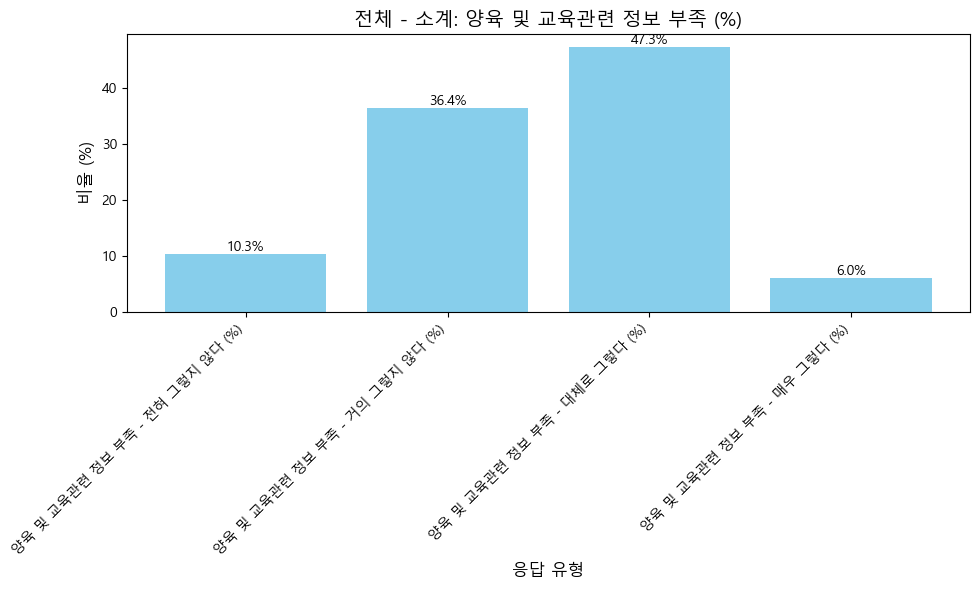

In [43]:
filtered_columns = ['특성별'] + [col for col in data2.columns if '양육 및 교육관련 정보 부족' in col]
filtered_data = data2[filtered_columns]

# 결과 출력
filtered_data

# "사례수 (가구)" 열 제외
df_filtered = filtered_data.drop(columns=["양육 및 교육관련 정보 부족 - 사례수 (가구)"])

# 데이터 타입 변환 (object -> float), 변환 불가능한 값은 NaN으로 처리
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# NaN 값을 확인하고 필요시 처리 (여기서는 0으로 대체)
df_filtered.fillna(0, inplace=True)

# 0번 행 데이터 추출
row_data = df_filtered.iloc[0, 1:]  # 첫 번째 행의 데이터 (특성별 제외)
labels = row_data.index  # x축 레이블
values = row_data.values  # y축 값

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')

# 막대 위에 수치 표시
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# 그래프 설정
plt.title("전체 - 소계: 양육 및 교육관련 정보 부족 (%)", fontsize=14)
plt.ylabel("비율 (%)", fontsize=12)
plt.xlabel("응답 유형", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()